In [1]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'c01a4630-cc02-4828-9991-41259d9cb1a4'
resource_group = 'bot-resource-group'
workspace_name = 'MindNotesAnalysis'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='UserDetails')
df = dataset.to_pandas_dataframe()

In [2]:
totalEntries = df["AppState"].size

In [3]:
totalEntries
jsonData = json.loads(df["AppState"][1])

selfDiscoveryDf = jsonData["selfDiscoveryState"]

NameError: name 'json' is not defined

In [ ]:
import json

for item in range(totalEntries):
    jsonData = json.loads(df["AppState"][item])

    selfDiscoveryDf = jsonData["selfDiscoveryState"]


In [ ]:
selfDiscoveryDf

{'level1': {'isLocked': False, 'progressValue': 12.5, 'responses': {}},
 'level2': {'isLocked': True,
  'progressValue': 12.5,
  'responses': {'VignetteSectionResponse': {},
   'DiscoveringEmotionResponse': {}}},
 'level3': {'isLocked': True,
  'progressValue': 12.5,
  'responses': {'GADSectionResponse': {},
   'PHQSectionResponse': {},
   'WsasResponse': {}},
  'homeState': {'anxiousCard': {'completed': False, 'locked': True},
   'lowCard': {'completed': False, 'locked': True},
   'functioningCard': {'completed': False, 'locked': True},
   'result': {'completed': False, 'locked': True},
   'homeTypeChosen': None}},
 'showIntro': True,
 'sdLevel1ReportChosen': 'FIRST_REPORT_CHOSEN',
 'showBackButtonModal': False}

In [ ]:
import enum

class LevelNumber(enum.Enum):
    level1 = "level1"
    level2 = "level2"
    level3 = "level3"
  
def checkLevelLockStatus(levelName, selfDiscoveryDf):
    return selfDiscoveryDf[levelName]["isLocked"]

def checkLevelProgressStatus(levelName, selfDiscoveryDf):
    return selfDiscoveryDf[levelName]["progressValue"]


# Seperate if else conditions added since later each code block would be customized per level
def checkSCResponses(levelType, selfDiscoveryDf):
    if(levelType == LevelNumber.level1):
        respDict = selfDiscoveryDf["level1"]["responses"]
        resp = {}
        for ke in respDict.keys():
            key_resp = "Q"+ "_" + ke
            resp[key_resp] = respDict[ke]["answer"]
        return resp
    elif(levelType == LevelNumber.level2):
        respDict = selfDiscoveryDf["level2"]["responses"]
        resp = {}
        questionList = ["timeOfRecording", "Think of a recent situation when you were critical towards yourself. Write down your self critical thoughts", "ACT1:Mindfulness", "ACT2:Common humanity", "ACT3:Kindness"]
        for ke in respDict.keys():
            key_resp = "Q"+ "_" + ke
            localResp = {}
            for item in range(len(questionList)):
                localResp[questionList[item]] =  respDict[ke]["answer"][item]
            resp[key_resp] = localResp
        return resp
    else:
        respDict = selfDiscoveryDf["level3"]["responses"]
        resp = {}
        questionList = ["timeOfRecording", "Think of and describe about a current struggle.","Express:Mindfulness", "Express:Common humanity", "Express:Kindness"]

        for ke in respDict.keys():
            key_resp = "Q"+ "_" + ke
            localResp = {}
            for item in range(len(questionList)):
                localResp[questionList[item]] =  respDict[ke]["answer"][item]
            resp[key_resp] = localResp      
        return resp




In [ ]:
checkLevelProgressStatus("level3", selfDiscoveryDf)

12.5

In [ ]:
checkSCResponses(LevelNumber.level2, selfDiscoveryDf)

KeyError: 'answer'

In [ ]:
selfDiscoveryDf["level3"]["homeState"]

{'anxiousCard': {'completed': False, 'locked': True},
 'lowCard': {'completed': False, 'locked': True},
 'functioningCard': {'completed': False, 'locked': True},
 'result': {'completed': False, 'locked': True},
 'homeTypeChosen': None}

In [ ]:
def checkSelfDiscoveryHomeState(selfDiscoveryDf):
    typeChosen = selfDiscoveryDf["level3"]["homeState"]["homeTypeChosen"]
    return typeChosen

In [ ]:
def iterateForAllUsers():
    total = df["AppState"].size
    userMapping = {}
    for user in range(total):
        jsonData = json.loads(df["AppState"][user])
        selfDiscoveryDf = jsonData["selfDiscoveryState"]
        userMapping[df["UserId"][user]] = checkSelfDiscoveryHomeState(selfDiscoveryDf)
    return userMapping

def checkLevel1ResponsesForAll():
    total = df["AppState"].size
    userMapping = {}
    for user in range(total):
        jsonData = json.loads(df["AppState"][user])
        selfDiscoveryDf = jsonData["selfDiscoveryState"]
        userMapping[df["UserId"][user]] = checkSCResponses(LevelNumber.level1, selfDiscoveryDf)
    return userMapping




In [ ]:
userMapping = iterateForAllUsers()

## Plotting Level 3 Self Discovery 
Plotting the number of Users who chose Type2/Type3/Type1 or didnt visit SelfDiscovery Level3 at all

In [ ]:
def checkCountType(typeHome,userMapping):
    count =0
    for k in userMapping.keys():
        if(userMapping[k] == typeHome):
            count += 1
    return count


In [ ]:
checkCountType('type2', userMapping)

2

Text(0.6, 0.3, 'T3 = anxiety & depression')

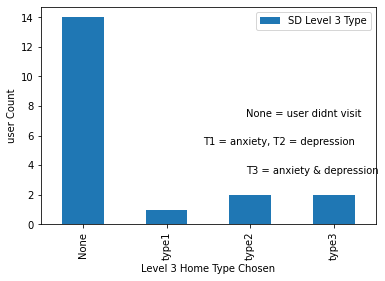

In [ ]:
# SD Level 3 Check which Type chosen
import matplotlib.pyplot as plt
import pandas as pd
homeTypes = [None, 'type1', 'type2', 'type3']
plotdata = pd.DataFrame(
    {"SD Level 3 Type": [checkCountType(typeHome, userMapping) for typeHome in homeTypes]}, 
    index=homeTypes)
# Plot a bar chart
plotdata.plot(kind="bar")
plt.xlabel("Level 3 Home Type Chosen")
plt.ylabel("user Count")
plt.figtext(.6, .5, "None = user didnt visit") 
plt.figtext(.5,.4, "T1 = anxiety, T2 = depression") 
plt.figtext(.6, .3, "T3 = anxiety & depression")
#plt.savefig('./Plots/SelfDiscovery/SDLevel3Type.png')

In [ ]:
selfDiscoveryDf["level1"]

{'isLocked': False, 'progressValue': 12.5, 'responses': {}}

In [ ]:
checkSCResponses(LevelNumber.level1, selfDiscoveryDf)

{}

In [ ]:
checkSCResponses(LevelNumber.level1, selfDiscoveryDf)

{}

Check the association strength between a particular SD L1 Question and its response.

Check for one-hot encoding

https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

One-hot encoding for the responses can be done.

# Creating a Dataframe


In [ ]:
selfDiscoveryDf

{'level1': {'isLocked': False, 'progressValue': 12.5, 'responses': {}},
 'level2': {'isLocked': True,
  'progressValue': 12.5,
  'responses': {'VignetteSectionResponse': {},
   'DiscoveringEmotionResponse': {}}},
 'level3': {'isLocked': True,
  'progressValue': 12.5,
  'responses': {'GADSectionResponse': {},
   'PHQSectionResponse': {},
   'WsasResponse': {}},
  'homeState': {'anxiousCard': {'completed': False, 'locked': True},
   'lowCard': {'completed': False, 'locked': True},
   'functioningCard': {'completed': False, 'locked': True},
   'result': {'completed': False, 'locked': True},
   'homeTypeChosen': None}},
 'showIntro': True,
 'sdLevel1ReportChosen': 'FIRST_REPORT_CHOSEN',
 'showBackButtonModal': False}

In [ ]:
def calculateTestScores(sectionResponse):
    su = 0
    for qid in sectionResponse.keys():
        su += int(sectionResponse[qid]["answer"])
    return su



In [ ]:
selfDiscoveryFinalDf = pd.DataFrame({"UserId":[],"SD Level 1 Progress":[], "SD Level 2 Progress":[], "SD Level 3 Progress": [], "Level 1 Q1 Responses":[], "Level 1 Q2 Responses": [],"Level 1 Q3 Responses" :[], "Level 1 Q4 Responses":[], "Level 2 Discovering Emotion Q1":[], "Level 2 Discovering Emotion Q2":[], "Vignette 1":[], "Vignette 2":[], "Vignette 3":[], "Vignette 4":[], "Vignette 5":[], "Level 3 Home Type Chosen":[], "PHQ Score":[], "GAD Score":[], "WSAS Score":[], "Suicide Q1":[], "Suicide Q2":[], "Suicide Q3":[], "Suicide Q4":[], "Suicide Q4 Free Text Response":[]})

In [ ]:
selfDiscoveryFinalDf["UserId"] = ["b93d2a00-fe4a-4b0f-4d7a-08d8cc33525c"]
selfDiscoveryFinalDf["SD Level 1 Progress"] = [100]
selfDiscoveryFinalDf["SD Level 2 Progress"] = [100]
selfDiscoveryFinalDf["SD Level 3 Progress"] = [100]
selfDiscoveryFinalDf["Level 1 Q1 Responses"] = ["more than a year"]
selfDiscoveryFinalDf["Level 1 Q2 Responses"] = ["rarely"]
selfDiscoveryFinalDf["Level 1 Q3 Responses"] = ["very often"]
selfDiscoveryFinalDf["Level 1 Q4 Responses"] = ["not confident at all"]
selfDiscoveryFinalDf["Level 2 Discovering Emotion Q1"] = list(selfDiscoveryDf["level2"]["responses"]["DiscoveringEmotionResponse"]["quid1"]["answer"]["quid1"].keys())[0]
selfDiscoveryFinalDf["Level 2 Discovering Emotion Q2"] = list(selfDiscoveryDf["level2"]["responses"]["DiscoveringEmotionResponse"]["quid2"]["answer"]["quid2"].keys())[0]
selfDiscoveryFinalDf["Vignette 1"] = selfDiscoveryDf["level2"]["responses"]["VignetteSectionResponse"]["quid1"]["answer"]
selfDiscoveryFinalDf["Vignette 2"] = selfDiscoveryDf["level2"]["responses"]["VignetteSectionResponse"]["quid2"]["answer"]
selfDiscoveryFinalDf["Vignette 3"] = selfDiscoveryDf["level2"]["responses"]["VignetteSectionResponse"]["quid3"]["answer"]
selfDiscoveryFinalDf["Vignette 4"] = selfDiscoveryDf["level2"]["responses"]["VignetteSectionResponse"]["quid4"]["answer"]
selfDiscoveryFinalDf["Vignette 5"] = selfDiscoveryDf["level2"]["responses"]["VignetteSectionResponse"]["quid5"]["answer"]
selfDiscoveryFinalDf["Level 3 Home Type Chosen"] = checkSelfDiscoveryHomeState(selfDiscoveryDf)
selfDiscoveryFinalDf["PHQ Score"] = calculateTestScores(selfDiscoveryDf["level3"]["responses"]["PHQSectionResponse"])
selfDiscoveryFinalDf["GAD Score"] = calculateTestScores(selfDiscoveryDf["level3"]["responses"]["GADSectionResponse"])
selfDiscoveryFinalDf["WSAS Score"] = calculateTestScores(selfDiscoveryDf["level3"]["responses"]["WsasResponse"])









KeyError: 'quid1'

In [ ]:
selfDiscoveryFinalDf

,UserId,SD Level 1 Progress,SD Level 2 Progress,SD Level 3 Progress,Level 1 Q1 Responses,Level 1 Q2 Responses,Level 1 Q3 Responses,Level 1 Q4 Responses,Level 2 Discovering Emotion Q1,Level 2 Discovering Emotion Q2,...,Vignette 5,Level 3 Home Type Chosen,PHQ Score,GAD Score,WSAS Score,Suicide Q1,Suicide Q2,Suicide Q3,Suicide Q4,Suicide Q4 Free Text Response
0,b93d2a00-fe4a-4b0f-4d7a-08d8cc33525c,100,100,100,more than a year,rarely,very often,not confident at all,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selfDiscoveryFinalDf

,UserId,SD Level 1 Progress,SD Level 2 Progress,SD Level 3 Progress,Level 1 Q1 Responses,Level 1 Q2 Responses,Level 1 Q3 Responses,Level 1 Q4 Responses,Level 2 Discovering Emotion Q1,Level 2 Discovering Emotion Q2,...,Vignette 5,Level 3 Home Type Chosen,PHQ Score,GAD Score,WSAS Score,Suicide Q1,Suicide Q2,Suicide Q3,Suicide Q4,Suicide Q4 Free Text Response
0,b93d2a00-fe4a-4b0f-4d7a-08d8cc33525c,100,100,100,more than a year,rarely,very often,not confident at all,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
local_path = 'Users/v-pratec/data/selfDiscovery.csv'

selfDiscoveryFinalDf.to_csv(local_path)

In [ ]:
datastore = workspace.get_default_datastore()
# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='Users/v-pratec/data', target_path='Users/v-pratec/data')

Uploading an estimated of 1 files
Target already exists. Skipping upload for Users/v-pratec/data/selfDiscovery.csv
Uploaded 0 files


$AZUREML_DATAREFERENCE_6df4c75f8cd64d79b9ccea18ca243309

In [ ]:
selfdiscoveryds = Dataset.Tabular.from_delimited_files(datastore.path('Users/v-pratec/data/selfDiscovery.csv'))


In [ ]:
selfDiscoveryDf["level1"]["progressValue"]

100

In [ ]:

userList = []
sdLevel1Progress = []
sdLevel2Progress = []
sdLevel3Progress = []
sdLevel1Q1Response = []
sdLevel1Q2Response = []
sdLevel1Q3Response = []
sdLevel1Q4Response = []
sdLevel2Q1Response = []
sdLevel2Q2Response = []
vignette1 = []
vignette2 = []
vignette3 = []
vignette4 = []
vignette5 = []
level3HomeType = []
phqScore = []
wsasScore = []
gadScore = []
suicideQ1Response = []
suicideQ2Response = []
suicideQ3Response = []
suicideQ4Response = []
suicideQ4FreeText = []


for item in range(totalEntries):
    userList.append(df["UserId"][item])
    jsonData = json.loads(df["AppState"][item])    
    selfDiscoveryDf = jsonData["selfDiscoveryState"]
    sdLevel1Progress.append(selfDiscoveryDf["level1"]["progressValue"])
    sdLevel2Progress.append(selfDiscoveryDf["level2"]["progressValue"])
    sdLevel3Progress.append(selfDiscoveryDf["level3"]["progressValue"])
    level1Responses = checkSCResponses(LevelNumber.level1, selfDiscoveryDf)
    if(level1Responses != {}):
        sdLevel1Q1Response.append(level1Responses["Q1"])
        sdLevel1Q2Response.append(level1Responses["Q2"])
        sdLevel1Q3Response.append(level1Responses["Q3"])
        sdLevel1Q4Response.append(level1Responses["Q4"])
    
#userList = [user for user in userMapping]
#sdLevel1Progress = [progress for progress in ]

['5704b8c3-0e67-4127-4d78-08d8cc33525c',
 'b93d2a00-fe4a-4b0f-4d7a-08d8cc33525c',
 'b6a54ac9-3268-4ecb-4d7b-08d8cc33525c',
 '4d65f14e-74b2-4077-4d7e-08d8cc33525c',
 '46557658-06af-4808-4d7f-08d8cc33525c',
 'c1f1cfbb-28b0-4788-4d80-08d8cc33525c',
 'adeb096a-0090-4191-4d81-08d8cc33525c',
 '17cb7b35-4653-4c2f-4d82-08d8cc33525c',
 '8ab775d5-6848-4687-4d83-08d8cc33525c',
 'f1031320-6c06-41bb-4d86-08d8cc33525c',
 '560fce02-1819-4493-4d87-08d8cc33525c',
 '3e6c01d2-603b-4553-4d88-08d8cc33525c',
 '18570ac4-1dda-46e5-bc91-08d8d6f4dffc',
 'c88ec046-af5b-42e4-e5a7-08d8deeb08c6',
 '474bedfb-bfe7-4fbb-e5a8-08d8deeb08c6',
 'e8e95a0c-0267-4201-7b10-08d8f45c19aa',
 'cfc020c0-1b36-4a41-c041-08d8f98f9467',
 '214df20d-8b7b-470c-7783-08d9000d5fcd',
 '5b833480-ed73-40a3-7784-08d9000d5fcd']